# Exercise 10

- In this exercise we will train a neural net to learn the two spirals dataset from [SyntheticDatasets.jl](https://github.com/ATISLabs/SyntheticDatasets.jl). The library itself isn't updated anymore and not really compatible with recent versions of Flux, Lux, etc. So, we just copied over the function that generates the dataset here. 

In [ ]:
import Pkg 
Pkg.activate(".")
Pkg.add(["Flux","Plots"])

In [1]:
using Flux, Plots

Precompiling Flux
  ✓ StructArrays → StructArraysGPUArraysCoreExt
  ✓ NNlib
  ✓ NNlib → NNlibForwardDiffExt
  ✓ NNlib → NNlibEnzymeCoreExt
  ✓ OneHotArrays
  ✓ MLUtils
  ✓ MLDataDevices → MLDataDevicesMLUtilsExt
  ✓ MLDataDevices → MLDataDevicesOneHotArraysExt
  ✓ MLDataDevices → MLDataDevicesZygoteExt
  ✓ Flux
  10 dependencies successfully precompiled in 12 seconds. 138 already precompiled.


In [2]:
"""
    make_twospirals(;    n_samples::Int = 2000,
                             start_degrees::Int = 90,
                             total_degrees::Int = 570,
                             noise::Float64 = 0.2
Generate two spirals dataset. Return a Nx3 matrix, where each line contains the X,Y coordinates and the class of an instance.
# Arguments
- `n_samples::Int = 2000`: The total number of points generated.
- `start_degrees::Int = 90`: Determines how far from the origin the spirals start.
- `total_degrees::Int = 570`: Controls the lenght of the spirals.
- `noise::Float64 = 0.2`: Determines the noise in the dataset.
Reference: [SyntheticDatasets.jl](https://github.com/ATISLabs/SyntheticDatasets.jl)
Reference: [link](https://la.mathworks.com/matlabcentral/fileexchange/41459-6-functions-for-generating-artificial-datasets)
"""
function make_twospirals(; n_samples::Int = 2000,
                               start_degrees::Int = 90,
                               total_degrees::Int = 570,
                               noise::Float64 = 0.2)
   start_degrees = deg2rad(start_degrees);

   N1 = floor(Int, n_samples / 2);
   N2 = n_samples - N1;

   n = start_degrees .+ sqrt.(rand(N1,1)) .* deg2rad(total_degrees);
   d1 = [-cos.(n).*n + rand(N1,1).*noise sin.(n).*n+rand(N1,1).*noise];

   n = start_degrees .+ sqrt.(rand(N2,1)) .* deg2rad(total_degrees);
   d2 = [cos.(n).*n+rand(N2,1)*noise -sin.(n).*n+rand(N2,1)*noise];

   features = [d1; d2]
   labels = [zeros(Int, N1); ones(Int, N2)]

   return (features, labels)
end

make_twospirals

In [3]:
# Generate the data
spirals = make_twospirals(n_samples = 1000, 
                            start_degrees = 90,
                            total_degrees = 630, 
                            noise = 1.0)

([-5.9536704586834714 2.789285995154663; 3.065041238240254 -10.414008686635208; … ; -5.525387738673648 9.034986136088431; -0.6955928167097803 4.826447046295657], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

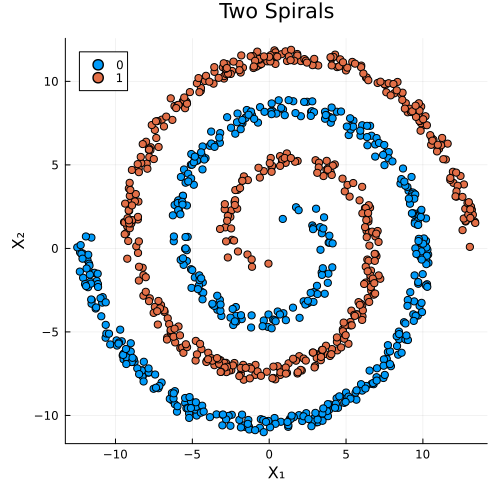

In [4]:
X = spirals[1]
y = spirals[2]

# Plot
scatter(X[:,1], X[:,2], group = y, xlabel = "X₁", ylabel = "X₂", title = "Two Spirals", size = (500, 500))

1. Follow Task 1 and Task 2 from the "Neural Net Spiral" exercise in this interactive [notebook](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises#neural-net-spiral) to experiment with many different model setups, varying the number of layers, the width of the layers, and the regularisation.

2. Once you're satisfied with your test error for a given model setup, implement and train that model in Julia using Flux or Lux. Note that the noise parameters in the notebook and the SyntheticDatasets library are not equivalent, so just try to use values of the parameters which result in visually similar datasets. Remember to split the data into training and test sets. Is the test error of your implementation comparable to the one in the notebook?